# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [1]:
!set - x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

     |████████████████████████████████| 19.4 MB 9.9 MB/s 
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 448 kB 41.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/

In [2]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
## for preprocessing
from gensim.parsing.preprocessing import preprocess_string

stop_words = pd.read_csv('/content/drive/MyDrive/KAU_KAC_paper/stop_words_korean.txt')
stop_list = [stop_words.iloc[i]['불용어'] for i in range(len(stop_words))]

def clean_text(data):
    pattern = r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-z ]'
    re.sub(pattern, '', data)
    return data

def clean_stop_words(data):
    return ''.join([w for w in data if w not in stop_words])

def preprocessing(data):
    return preprocess_string(data)

In [8]:
article_1912_2004 = pd.read_csv('/content/drive/MyDrive/KAU_KAC_paper/naver_article/article_1912_2004.csv', encoding='utf-8-sig')
article_2004_2010 = pd.read_csv('/content/drive/MyDrive/KAU_KAC_paper/naver_article/article_2004_2010.csv', encoding='utf-8-sig')

In [18]:
lda_df = article_1912_2004['body']
lda_df = lda_df.apply(clean_stop_words)

In [19]:
lda_df

0        \n[한국경제TV 강다은 캐스터][NATO 정상들 뒷담화에 트럼프 "이중적"]NAT...
1        \n파커 태양 탐사선 수집 데이터 발표[서울신문]지난해 8월 발사된 인류 최초의 태...
2        \n24번째 맞은 태양 주기의 10년 기록들2014년이 정점...지금은 극소기 통과...
3        \n네이처 제공    국제학술지 ‘네이처’는 12일 태양 앞에 다가선 미국항공우주국...
4        \n태양 주변 자기장이 갑자기 요동… 태양풍도 급가속하는 현상 발견회전속도도 가설보...
                               ...                        
22441    \n\t\n\t정부 "이탈리아 교민 530여명 이송"…로마 전세기는 212명 태우고...
22442    \n3월 넷째주 실업수당 신청 최대 650만건 예상도　미국 워싱턴에 있는 트럼프호텔...
22443    \n기한만료 외교문서 해제…코로나 전세기 급파 현실과 오버랩[CBS노컷뉴스 홍제표 ...
22444    \n3월 넷째주 실업수당 신청 최대 650만건 예상도　미국 워싱턴에 있는 트럼프호텔...
22445    \n기한만료 외교문서 해제…코로나 전세기 급파 현실과 오버랩[CBS노컷뉴스 홍제표 ...
Name: body, Length: 22446, dtype: object

In [20]:
mecab = Mecab()
line_list = []

for line in lda_df:
    line_list.append(mecab.nouns(line))

print("- 불러온 문서 :", len(line_list), "단어")
print(line_list)

- 불러온 문서 : 22446 단어


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
word_frequency = {}
noun_list = []
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [24]:
#단어별 출현빈도를 출력합니다.
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:20]:
    print(n + "\t" + str(freq))

코로나	101283
중국	65330
정부	35719
확진	34569
신종	33806
바이러스	33588
입국	33233
우한	32724
기자	32672
뉴스	31913
한국	28761
공항	28636
경제	28492
금지	27122
환자	23997
격리	23750
항공	23636
확산	22691
조치	22428
지역	21729


In [25]:
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)
topic = 5
keyword = 10
texts = []
resultList = []
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(27419 unique tokens: ['가난', '각국', '개발', '검색', '겨냥']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(39571 unique tokens: ['가난', '각국', '개발', '검색', '겨냥']...)
INFO:gensim.corpora.dictionary:built Dictionary(41868 unique tokens: ['가난', '각국', '개발', '검색', '겨냥']...) from 22446 documents (total 5120004 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 22446 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at docum

In [26]:
resultList

[[('코로나', 0.022175701),
  ('경제', 0.016196162),
  ('기업', 0.013345922),
  ('미국', 0.010519383),
  ('달러', 0.008573162),
  ('시장', 0.0076701),
  ('산업', 0.0072145523),
  ('금융', 0.0070871613),
  ('세계', 0.0067783296),
  ('생산', 0.006716299)],
 [('확진', 0.021348791),
  ('코로나', 0.019829063),
  ('격리', 0.01842783),
  ('입국', 0.01695327),
  ('공항', 0.016763154),
  ('검사', 0.0144219855),
  ('교민', 0.011126088),
  ('환자', 0.01096629),
  ('인천', 0.010641571),
  ('제주', 0.009269668)],
 [('코로나', 0.017739503),
  ('지원', 0.017603982),
  ('항공', 0.013524895),
  ('항공사', 0.010225772),
  ('기자', 0.008299881),
  ('노선', 0.008120579),
  ('정부', 0.0065075844),
  ('뉴스', 0.006452402),
  ('운항', 0.0064480165),
  ('경영', 0.0064415727)],
 [('코로나', 0.013508341),
  ('정부', 0.009112962),
  ('대통령', 0.007773501),
  ('상황', 0.007181117),
  ('지역', 0.0068789828),
  ('지원', 0.0067550014),
  ('국민', 0.00639838),
  ('사회', 0.0059987935),
  ('방역', 0.005339179),
  ('필요', 0.00533513)],
 [('코로나', 0.031621847),
  ('중국', 0.024072893),
  ('한국', 0.016911937

In [27]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics = 5, id2word = dictionary)
topics = lda_model.print_topics()
topics

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 22446 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/22446
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:6/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 22446 documents
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.035*"중국" + 0.027*"우한" + 0.017*"환자" + 0.015*"바이러스" + 0.015*"코로나" + 0.015*"확진" + 0.014*"신종" + 0.013*"폐렴" + 0.010*"공항" + 0.008*"증상"
I

[(0,
  '0.028*"확진" + 0.024*"코로나" + 0.015*"제주" + 0.014*"격리" + 0.013*"검사" + 0.012*"공항" + 0.011*"입국" + 0.010*"환자" + 0.010*"판정" + 0.008*"병원"'),
 (1,
  '0.013*"지원" + 0.013*"코로나" + 0.012*"기업" + 0.010*"경제" + 0.007*"금융" + 0.006*"정부" + 0.006*"산업" + 0.005*"위기" + 0.005*"기자" + 0.005*"시장"'),
 (2,
  '0.028*"입국" + 0.019*"코로나" + 0.018*"공항" + 0.018*"격리" + 0.016*"한국" + 0.015*"교민" + 0.015*"정부" + 0.013*"귀국" + 0.012*"전세기" + 0.012*"인천"'),
 (3,
  '0.030*"코로나" + 0.014*"항공" + 0.012*"미국" + 0.011*"항공사" + 0.011*"운항" + 0.009*"노선" + 0.008*"뉴스" + 0.007*"중단" + 0.007*"경제" + 0.007*"기자"'),
 (4,
  '0.026*"코로나" + 0.011*"확진" + 0.011*"중국" + 0.008*"미국" + 0.007*"지역" + 0.007*"정부" + 0.007*"확산" + 0.006*"세계" + 0.006*"상황" + 0.006*"바이러스"')]

In [28]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 3, 15
coherence_scores = []

for num_topic in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics = num_topic, id2word = dictionary)
    coherence = CoherenceModel(model = model,
                               texts = texts,
                               dictionary = dictionary)
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 797000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 798000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 799000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 800000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 801000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 802000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 803000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 804000 documents
INFO:gensim.topic_coherence.text_analysis:WordOccurrenceAccumulator accumulated stats from 805000 do

[0.43676829713245474, 0.5137871919049908, 0.49303828000477773, 0.4854044285979488, 0.5055390882049482, 0.5041787776328199, 0.5292249866211873, 0.5054122978292315, 0.5300456380249364, 0.5072321782908843, 0.49939295850135107, 0.5047142178512215]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 5.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 70

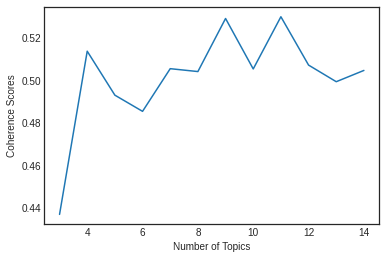

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure()
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [30]:
LDAmodel = LdaModel(corpus, num_topics = 6, id2word = dictionary)
topics = LDAmodel.print_topics(num_topics = 6)
topics

INFO:gensim.models.ldamodel:using symmetric alpha at 0.16666666666666666
INFO:gensim.models.ldamodel:using symmetric eta at 0.16666666666666666
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 22446 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/22446
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:5/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 22446 documents
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.036*"중국" + 0.028*"우한" + 0.016*"환자" + 0.015*"바이러스" + 0.014*"확진" + 0.013*"신종" + 0.012*"폐렴" + 0.012*"

[(0,
  '0.019*"코로나" + 0.015*"경제" + 0.014*"지원" + 0.010*"정부" + 0.007*"미국" + 0.006*"대통령" + 0.006*"달러" + 0.006*"기업" + 0.006*"금융" + 0.005*"위기"'),
 (1,
  '0.026*"코로나" + 0.010*"뉴스" + 0.009*"확진" + 0.008*"한국" + 0.007*"베트남" + 0.006*"중국" + 0.006*"사람" + 0.006*"기자" + 0.006*"마스크" + 0.006*"상황"'),
 (2,
  '0.015*"코로나" + 0.012*"기업" + 0.008*"지원" + 0.008*"항공" + 0.007*"경영" + 0.006*"기자" + 0.005*"상황" + 0.005*"경제" + 0.005*"위기" + 0.005*"회장"'),
 (3,
  '0.032*"코로나" + 0.017*"중국" + 0.016*"미국" + 0.015*"운항" + 0.012*"노선" + 0.012*"항공" + 0.011*"항공사" + 0.010*"금지" + 0.010*"조치" + 0.010*"한국"'),
 (4,
  '0.036*"공항" + 0.026*"인천" + 0.021*"교민" + 0.019*"코로나" + 0.018*"뉴스" + 0.018*"전세기" + 0.016*"귀국" + 0.014*"정부" + 0.014*"기자" + 0.014*"한국"'),
 (5,
  '0.027*"확진" + 0.024*"입국" + 0.022*"코로나" + 0.020*"격리" + 0.015*"검사" + 0.013*"제주" + 0.011*"환자" + 0.008*"판정" + 0.008*"방역" + 0.008*"시설"')]

## 토픽 모델링 시각화

In [31]:
!apt install pyLDAvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pyLDAvis


In [33]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 170 kB/s 
     |████████████████████████████████| 11.3 MB 38.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=00f491dd766252608f5b55ae75239ebf53c9148dafb601248a926740c409cac5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [45]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, dictionary)
vis = gensimvis.prepare(LDAmodel, corpus, dictionary)
pyLDAvis.display(vis)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 22446 documents
DEBUG:gensim.models.ldamodel:16193/22446 documents converged within 50 iterations


TypeError: ignored

In [43]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, dictionary)
vis = gensimvis.prepare(LDAmodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis)



DEBUG:gensim.models.ldamodel:performing inference on a chunk of 22446 documents
DEBUG:gensim.models.ldamodel:16177/22446 documents converged within 50 iterations


TypeError: ignored

In [44]:
import pyLDAvis.gensim

ModuleNotFoundError: ignored